# Assignment 6

This assignment mainly enhances your **Model Fitting, Parameter Tuning, and Model Evaluation** Skills. 
The total mark for this assignment is 72. Answer the questions in the code chunk and 
fill up the missing part of the code. The tentative due date for this assignment
is 9:00 PM, March 8th. If I fall behind my schedule, extensions will be given.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
## read the datset from your local drive
from google.colab import files
upload = files.upload()

In [30]:
## Upload the cleaned dataset
## upload the dataset
import pandas as pd
X_train = pd.read_csv('X_train_sc.csv')
X_test = pd.read_csv('X_test_sc.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [31]:
y_train.head()

,Unnamed: 0,SalePrice
0,624,12.014609
1,592,11.835009
2,48,11.635143
3,1070,11.813030
4,1234,11.775290


In [32]:
y_train = y_train['SalePrice']
y_test = y_test['SalePrice']

In [33]:
y_train.head()

0    12.014609
1    11.835009
2    11.635143
3    11.813030
4    11.775290
Name: SalePrice, dtype: float64

In [34]:
y_test.head()

0    11.805595
1    12.357076
2    11.995352
3    11.819675
4    12.100712
Name: SalePrice, dtype: float64

In [35]:
## Fit a Lasso Regression
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

R2 score (train) :  0.684
R2 score (test) :  0.6925
RMSE (train) :  0.2246
RMSE (test) :  0.221


In [36]:
### What if I would like to set my tuning parameter alpha=0.00125?
##### ToDo##############################################################
#### 6 points
#### fill out the code below
### fit a new lasso model
### fit it with X_train and y_train
### make predictions for the training set and testing set
### Perform mdoel evaluation using both training lables and testing labels
### using both r2_score and rmse
lasso = Lasso(alpha=0.00125)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))


R2 score (train) :  0.9092
R2 score (test) :  0.8923
RMSE (train) :  0.1204
RMSE (test) :  0.1308


In [37]:
### What if I would like to set alpha=0.5?
##### ToDo##############################################################
#### 6 points
### fill out the code below
### fit a new lasso model
### fit it with X_train and y_train
### make predictions for the training set and testing set
### Perform mdoel evaluation using both training lables and testing labels
### using both r2_score and rmse
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))


R2 score (train) :  0.0001
R2 score (test) :  -0.0017
RMSE (train) :  0.3995
RMSE (test) :  0.3988


In [38]:
###################################################################
### ToDO ##########################################################
## 15 points
### Hold-out cross-validation
###################################################################
### If I want to check the effect of different values of the tuning parameter
### in the LASSO penalty on the prediction performance, write a function
### that takes a sequence of alpha values as input and returns the result of R2 
### score and RMSE of y_train and y_test
import numpy as np

## Objectives of writing functions, reduce repetitive labours and 
## avoid copy paste error
def ModelTrainAndEvaluaion(alphaValues, xtrain, xtest, ytrain, ytest):
    """
    Parameters: 

    -alphaValues: a vector of different tuning parameter values
    -xtrain: the training dataset
    -xtest: the testing set
    -ytrain: target var for training set
    -ytest: target var for testing set

    Output:
    returns a dictionary that stores the r2, rmse of the training and
    testing set respectively. Choose a dictionary data structure to
    save the result
    """

    ##########Define Data Structures ##################
    #### Define data structures to store your results
    ## first, get the number of different values
    num = len(alphaValues)
    r2train = np.zeros(num)
    r2test = np.zeros(num)
    rmsetrain = np.zeros(num)
    rmsetest = np.zeros(num)

    #### Model fitting and evaluation with different tuning parameters
    for i in range(num):
      lasso = Lasso(alpha=alphaValues[i])
      lasso.fit(X_train, y_train)

      y_train_pred = lasso.predict(X_train)
      y_test_pred =  lasso.predict(X_test)

      r2train[i]= round(r2_score(y_train,y_train_pred),4)
      r2test[i]=round(r2_score(y_test,y_test_pred),4)
      rmsetrain[i]=round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4)
      rmsetest[i]=round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4)
    ###################################################################
    #### save all the results in a dictionary
    result= dict()
    result['r2train']= r2train
    result['r2test']= r2test
    result['rmsetrain']= rmsetrain
    result['rmsetest'] = rmsetest

    return result
    

### Example usage of this function
alphaValues = [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]
result = ModelTrainAndEvaluaion(alphaValues, X_train, X_test, y_train, y_test)
print(result['r2test'])
print(result['rmsetest'])

[ 0.8875  0.8892  0.891   0.8916  0.892   0.8923  0.8935  0.8932  0.8877
  0.6925 -0.0013]
[0.1336 0.1327 0.1316 0.1312 0.1309 0.1308 0.1301 0.1302 0.1336 0.221
 0.3988]


In [39]:
###### ToDO################################################
##### 3 points

### Model selection 
### How to choose the best tunning parameter?
import numpy as np
rmseValues = result['rmsetest']
## find the minimum value of the rmse
minrmse = np.min(result['rmsetest'])
print(minrmse)
## find the index of the minimum rmse values 
minInd= np.argmin(result['rmsetest'])
print(minInd)
## using this index and find the corresponding alpha value
bestAlpha= alphaValues[minInd]
print(bestAlpha)



0.1301
6
0.0025


In [40]:
######################################################
### ToDO #############################################
### 10 points ########################################
### Write the previous computations into a function
######################################################
## Can you change this into a function 
## with alphaValues and rmseValues as input parameters
## return the minimum rmse value, 
##        the index of the minimum rmse value
##      the corresponding alpha value
def tuningParamSelection(alphaValues, rmseValues):   
    """
    Parameters: 

    -rmseValues: a list or an numpy array of rmse values
    -alphaValues: a vector of different tuning parameter values

    Output:
    returns a dictionary that stores index of the minimum
    rmse and the corresponding alpha value that has the min rmse
    save the result in a dictionary and return it
    """
    
    
    
    ## find the minimum value of the rmse
    minRmse = np.min(rmseValues)
    ## find the index of the minimum rmse values 
    minInd = np.argmin(rmseValues)
    ## using this index and find the corresponding alpha value
    bestAlpha = alphaValues[minInd]
    ## save minInd and bestAlpha into a dictionary 
  

    result = dict()
    result['minInd'] = minInd
    result['bestAlpha'] = bestAlpha
    return result



### Example usage of this function
alphaValues = [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]
result = tuningParamSelection(alphaValues, rmseValues)
print(result)

{'minInd': 6, 'bestAlpha': 0.0025}


In [24]:
##############################################################
### Todo #####################################################
### 10 points
### K fold cross-validation
##############################################################
folds = KFold(n_splits = 5)
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}

model = Lasso()
### GridSearch and Model training
model_cv = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              scoring= 'r2', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1) 
### use model_cv to fit with X_train and y_train           
model_cv.fit(X_train, y_train)

### get the best alpha
alpha = model_cv.best_params_
print(alpha)

### get the best estimator from model_cv and set it as final_model
final_model= model_cv.best_estimator_

### use final_model to fit with X_train and y_train
final_model.fit(X_train, y_train)

## Model Prediction using X_train and X_test respectively
y_train_pred =  final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Model Evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

## save the cross validation results into a data frame
cvResults = pd.DataFrame(model_cv.cv_results_)
cvResults.head(5)

cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')
print(cvResults)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
{'alpha': 0.0025}
R2 score (train) :  0.9077
R2 score (test) :  0.8935
RMSE (train) :  0.1214
RMSE (test) :  0.1301
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.010834      0.003900         0.002178        0.000355      0.00010   
1        0.007904      0.003106         0.001796        0.000398      0.00025   
2        0.006584      0.002290         0.001595        0.000797      0.00050   
3        0.005199      0.002481         0.001702        0.000399      0.00065   
4        0.004258      0.000747         0.001799        0.000747      0.00100   
5        0.004315      0.000885         0.001796        0.000398      0.00125   
6        0.003601      0.000492         0.001402        0.000492      0.00250   
7        0.004001      0.000897         0.002106        0.000229      0.00500   
8        0.003803      0.000752         0.002335        0.000436      0.01000   
9        0.00

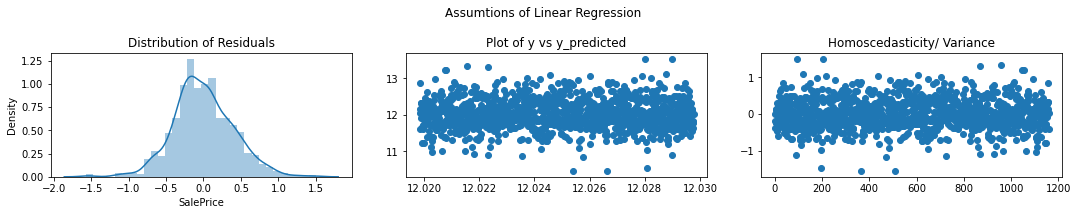

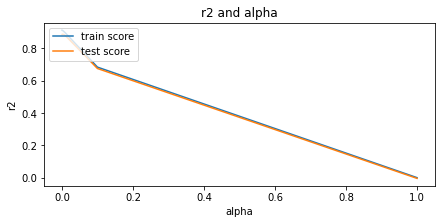

In [41]:
### Model Assumptions and Diagnostics
#######ToDO####################################################
## 5 points
fig, axes = plt.subplots(1, 3, figsize=(15,3))
fig.suptitle('Assumtions of Linear Regression')
### fill out the code here plot the distribution of 
sns.distplot(y_train - y_train_pred, ax=axes[0])
axes[0].set_title('Distribution of Residuals')

### fill out the scatterplot of y_train_pred[:, 1] and y_train.iloc[:,1]
axes[1].scatter(y_train_pred,y_train)
axes[1].set_title('Plot of y vs y_predicted')

### fill out the scatterplot of X_train.index and y_train.iloc[:, 1]-y_train_pred[:, 1]
axes[2].scatter(X_train.index, y_train-y_train_pred)
axes[2].set_title('Homoscedasticity/ Variance')
plt.tight_layout()

# plotting
fig = plt.figure(figsize=(7,3))
## use plt.plot to draw cvResults['param_alpha'] as x axis
## and use cvResults['mean_train_score'] as y axis
plt.plot(cvResults['param_alpha'],cvResults['mean_train_score'])

## use plt.plot to draw cvResults['param_alpha'] as x axis
## and use cvResults['mean_train_score'] as y axis
plt.plot(cvResults['param_alpha'],cvResults['mean_test_score'])


plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


Fitting 5 folds for each of 11 candidates, totalling 55 fits
R2 score (train) :  0.9077
R2 score (test) :  0.8935
RMSE (train) :  0.1214
RMSE (test) :  0.1301


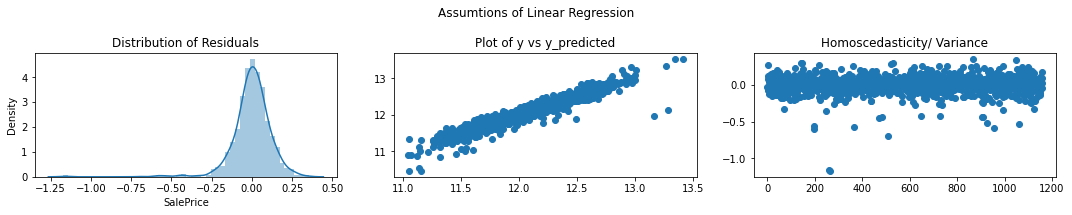

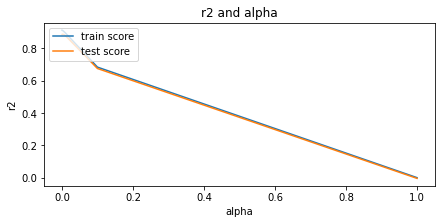

In [42]:
###### Combine the K-fold cross validation and model diagnostics 
###### into a function. 
###### Then input of the function should include 1. model
###### For example, model can be Lasso() or Ridge()
###### 2. params should be a dictionary of the candidate alpha values
###### 3. dataset, xtrain, xtest ytrain, ytest
###### scoring criterion should be r2 
###### return the final model selected by cross validation that has 
###### the largest r2 value

### ToDO ###############################################################
### 15 points
def ModelTrainAndEvaluaion(model, params, xtrain, xtest, ytrain, ytest):
    folds = KFold(n_splits=5)
    ### GridSearch and Model training
    model_cv = GridSearchCV(estimator = model, 
                                param_grid = params, 
                                scoring= 'r2', 
                                cv = folds, 
                                return_train_score=True,
                                verbose = 1) 
    ### use model_cv to fit with X_train and y_train  
    model_cv.fit(X_train,y_train)
    ### get the best alpha    
    alpha = model_cv.best_params_
    ### get the best estimator from model_cv and set it as final_model
    final_model= model_cv.best_estimator_
    ### use final_model to fit with X_train and y_train   
    final_model.fit(X_train, y_train)
    ## Model Prediction using X_train and X_test respectively   
    y_train_pred =  final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    # Model Evaluation    
    print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
    print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
    print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
    print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
    
    
    cvResults = pd.DataFrame(model_cv.cv_results_)
    cvResults.head(5)

    cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')
    
    ### Model Assumptions and Diagnostics
    fig, axes = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle('Assumtions of Linear Regression')
    ### fill out the code here plot the distribution of 
    sns.distplot(y_train - y_train_pred, ax=axes[0])
    axes[0].set_title('Distribution of Residuals')

    ### fill out the scatterplot of y_train_pred[:, 1] and y_train.iloc[:,1]
    axes[1].scatter(y_train_pred,y_train)
    axes[1].set_title('Plot of y vs y_predicted')

    ### fill out the scatterplot of X_train.index and y_train.iloc[:, 1]-y_train_pred[:, 1]
    axes[2].scatter(X_train.index, y_train-y_train_pred)
    axes[2].set_title('Homoscedasticity/ Variance')
    plt.tight_layout()

    # plotting
    fig = plt.figure(figsize=(7,3))
    ## use plt.plot to draw cvResults['param_alpha'] as x axis
    ## and use cvResults['mean_train_score'] as y axis
    plt.plot(cvResults['param_alpha'],cvResults['mean_train_score'])

    ## use plt.plot to draw cvResults['param_alpha'] as x axis
    ## and use cvResults['mean_train_score'] as y axis
    plt.plot(cvResults['param_alpha'],cvResults['mean_test_score'])


    plt.xlabel('alpha')
    plt.ylabel('r2')

    plt.title("r2 and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()
    return final_model

####  example use of this function
# params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}
finalModel = ModelTrainAndEvaluaion(Lasso(), params=params, 
                                    xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test)


Fitting 5 folds for each of 29 candidates, totalling 145 fits
R2 score (train) :  0.9089
R2 score (test) :  0.8897
RMSE (train) :  0.1206
RMSE (test) :  0.1323


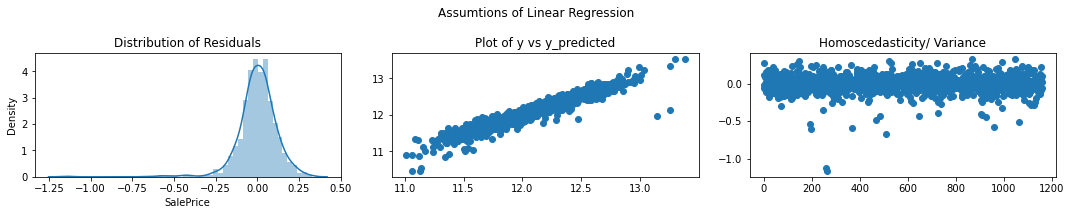

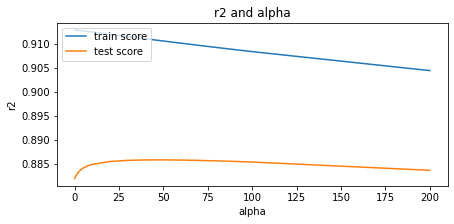

In [44]:
#### Use the function ModelTrainAndEvaluaion to fit a ridge regression with the 
### following parameters params
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                        9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}

################################################################################
### ToDO 
### 2 points
### fill out the code here                        
ridge = ModelTrainAndEvaluaion(Ridge(), params=params, 
                                    xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test)